# Optimal Groups Based on Clustering 

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#uploading the data

In [4]:
df = pd.read_csv('movfile3.csv')

In [5]:
df

,movie_id,title,budget,homepage,original_language,overview,popularity,release_date,revenue,runtime,...,genre1,Directors,Lead_actr,Lead_Char,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
0,19995,Avatar,237000000,http://www.avatarmovie.com/,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,10-12-2009,2787965087,162.0,...,Action,James Cameron,Sam Worthington,Jake Sully,83,United States of America,Ingenious Film Partners,2009,2550965087,Good
1,285,Pirates of the Caribbean: At World's End,300000000,http://disney.go.com/disneypictures/pirates/,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,19-05-2007,961000000,169.0,...,Adventure,Gore Verbinski,Johnny Depp,Captain Jack Sparrow,34,United Kingdom,Twentieth Century Fox Film Corporation,2007,661000000,Good
2,206647,Spectre,245000000,http://www.sonypictures.com/movies/spectre/,en,A cryptic message from Bond’s past sends him o...,107.376788,26-10-2015,880674609,148.0,...,Action,Sam Mendes,Daniel Craig,James Bond,83,United States of America,Dune Entertainment,2015,635674609,Average
3,49026,The Dark Knight Rises,250000000,http://www.thedarkknightrises.com/,en,Following the death of District Attorney Harve...,112.312950,16-07-2012,1084939099,165.0,...,Action,Christopher Nolan,Christian Bale,Bruce Wayne / Batman,158,United Kingdom,Lightstorm Entertainment,2012,834939099,Good
4,49529,John Carter,260000000,http://movies.disney.com/john-carter,en,"John Carter is a war-weary, former military ca...",43.926995,07-03-2012,284139100,132.0,...,Action,Andrew Stanton,Taylor Kitsch,John Carter,27,United States of America,Walt Disney Pictures,2012,24139100,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,14337,Primer,1000000,http://www.primermovie.com,en,Friends/fledgling entrepreneurs invent a devic...,23.307949,08-10-2004,424760,77.0,...,Science Fiction,Shane Carruth,Shane Carruth,Aaron,19,United States of America,New Crime Productions,2004,-575240,Good
4735,9367,El Mariachi,1000000,NaN,es,El Mariachi just wants to play his guitar and ...,14.269792,04-09-1992,2040920,81.0,...,Action,Robert Rodriguez,Carlos Gallardo,El Mariachi,7,United States of America,Color Force,1992,1040920,Good
4736,72766,Newlyweds,1000000,NaN,en,A newlywed couple's honeymoon is upended by th...,0.642552,26-12-2011,0,85.0,...,Comedy,Edward Burns,Edward Burns,Buzzy,5,Canada,Boxing Cat Films,2011,-1000000,Average
4737,231617,"Signed, Sealed, Delivered",1000000,http://www.hallmarkchannel.com/signedsealeddel...,en,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,13-10-2013,0,120.0,...,Comedy,Scott Smith,Eric Mabius,Oliver O’Toole,7,United Kingdom,St. Petersburg Clearwater Film Commission,2013,-1000000,Good


In [6]:
#chcking for null values
df.isnull().sum()

movie_id                0
title                   0
budget                  0
homepage             3040
original_language       0
overview                2
popularity              0
release_date            0
revenue                 0
runtime                 0
status                  0
tagline               794
vote_average            0
vote_count              0
genre1                  0
Directors               0
Lead_actr               0
Lead_Char              27
actor_count             0
Prodcountries           0
Prodcompanies           0
release_year            0
profit                  0
Quality                 0
dtype: int64

In [7]:
#replacing null values
df =df.dropna(subset=['Lead_Char'])

In [8]:
#dropping the column
df.drop (columns=['movie_id','title','homepage','overview','tagline','release_date','Lead_actr','Lead_Char'],inplace=True)

In [9]:
df.head()

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
0,237000000,en,150.437577,2787965087,162.0,Released,7.2,11800,Action,James Cameron,83,United States of America,Ingenious Film Partners,2009,2550965087,Good
1,300000000,en,139.082615,961000000,169.0,Released,6.9,4500,Adventure,Gore Verbinski,34,United Kingdom,Twentieth Century Fox Film Corporation,2007,661000000,Good
2,245000000,en,107.376788,880674609,148.0,Released,6.3,4466,Action,Sam Mendes,83,United States of America,Dune Entertainment,2015,635674609,Average
3,250000000,en,112.312950,1084939099,165.0,Released,7.6,9106,Action,Christopher Nolan,158,United Kingdom,Lightstorm Entertainment,2012,834939099,Good
4,260000000,en,43.926995,284139100,132.0,Released,6.1,2124,Action,Andrew Stanton,27,United States of America,Walt Disney Pictures,2012,24139100,Average


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4712 entries, 0 to 4738
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4712 non-null   int64  
 1   original_language  4712 non-null   object 
 2   popularity         4712 non-null   float64
 3   revenue            4712 non-null   int64  
 4   runtime            4712 non-null   float64
 5   status             4712 non-null   object 
 6   vote_average       4712 non-null   float64
 7   vote_count         4712 non-null   int64  
 8   genre1             4712 non-null   object 
 9   Directors          4712 non-null   object 
 10  actor_count        4712 non-null   int64  
 11  Prodcountries      4712 non-null   object 
 12  Prodcompanies      4712 non-null   object 
 13  release_year       4712 non-null   int64  
 14  profit             4712 non-null   int64  
 15  Quality            4712 non-null   object 
dtypes: float64(3), int64(6), obje

**TOP Rated**

In [11]:
# df1=df.copy()

In [12]:
topdf = df[df['Quality']=='Good']

In [13]:
topdf

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
0,237000000,en,150.437577,2787965087,162.0,Released,7.2,11800,Action,James Cameron,83,United States of America,Ingenious Film Partners,2009,2550965087,Good
1,300000000,en,139.082615,961000000,169.0,Released,6.9,4500,Adventure,Gore Verbinski,34,United Kingdom,Twentieth Century Fox Film Corporation,2007,661000000,Good
3,250000000,en,112.312950,1084939099,165.0,Released,7.6,9106,Action,Christopher Nolan,158,United Kingdom,Lightstorm Entertainment,2012,834939099,Good
6,260000000,en,48.681969,591794936,100.0,Released,7.4,3330,Animation,Byron Howard,13,United States of America,Second Mate Productions,2010,331794936,Good
7,280000000,en,134.279229,1405403694,141.0,Released,7.3,6767,Action,Joss Whedon,72,United States of America,Columbia Pictures,2015,1125403694,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728,1000000,fa,1.193779,0,90.0,Released,6.6,58,Drama,Jafar Panahi,7,France,Spelling Films,2000,-1000000,Good
4730,1000000,ja,0.212443,99000,111.0,Released,7.4,63,Crime,Kiyoshi Kurosawa,15,United States of America,TaliaFilm II Productions,1997,-901000,Good
4734,1000000,en,23.307949,424760,77.0,Released,6.9,658,Science Fiction,Shane Carruth,19,United States of America,New Crime Productions,2004,-575240,Good
4735,1000000,es,14.269792,2040920,81.0,Released,6.6,238,Action,Robert Rodriguez,7,United States of America,Color Force,1992,1040920,Good


In [14]:
goodf = topdf.copy()

In [15]:
topdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2122 entries, 0 to 4737
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             2122 non-null   int64  
 1   original_language  2122 non-null   object 
 2   popularity         2122 non-null   float64
 3   revenue            2122 non-null   int64  
 4   runtime            2122 non-null   float64
 5   status             2122 non-null   object 
 6   vote_average       2122 non-null   float64
 7   vote_count         2122 non-null   int64  
 8   genre1             2122 non-null   object 
 9   Directors          2122 non-null   object 
 10  actor_count        2122 non-null   int64  
 11  Prodcountries      2122 non-null   object 
 12  Prodcompanies      2122 non-null   object 
 13  release_year       2122 non-null   int64  
 14  profit             2122 non-null   int64  
 15  Quality            2122 non-null   object 
dtypes: float64(3), int64(6), obje

In [16]:
topdf['genre1'].value_counts()

genre1
Drama              728
Comedy             353
Action             262
Adventure          161
Crime              108
Horror              71
Animation           67
Thriller            65
Romance             54
Fantasy             52
Documentary         51
Science Fiction     43
Music               20
Western             20
History             18
Family              18
War                 16
Mystery             14
Foreign              1
Name: count, dtype: int64

In [17]:
#deselcting values
topdf=topdf[(topdf['genre1']!="Foreign")]

In [18]:
g2df = topdf.copy()

In [19]:
# as category type

In [20]:
cat_col = ['Quality','original_language','genre1','status','Directors','Prodcountries','Prodcompanies']
topdf[cat_col] = topdf[cat_col].astype('category')

In [21]:
# label encoding

In [22]:
from sklearn import preprocessing

In [23]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    topdf[col] = label_encoder.fit_transform(topdf[col])

In [24]:
topdf

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
0,237000000,7,150.437577,2787965087,162.0,1,7.2,11800,0,419,83,53,364,2009,2550965087,0
1,300000000,7,139.082615,961000000,169.0,1,6.9,4500,1,361,34,52,814,2007,661000000,0
3,250000000,7,112.312950,1084939099,165.0,1,7.6,9106,0,169,158,52,445,2012,834939099,0
6,260000000,7,48.681969,591794936,100.0,1,7.4,3330,2,133,13,53,707,2010,331794936,0
7,280000000,7,134.279229,1405403694,141.0,1,7.3,6767,0,559,72,53,155,2015,1125403694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728,1000000,9,1.193779,0,90.0,1,6.6,58,6,412,7,13,739,2000,-1000000,0
4730,1000000,17,0.212443,99000,111.0,1,7.4,63,4,608,15,53,774,1997,-901000,0
4734,1000000,7,23.307949,424760,77.0,1,6.9,658,14,979,19,53,548,2004,-575240,0
4735,1000000,8,14.269792,2040920,81.0,1,6.6,238,0,924,7,53,152,1992,1040920,0


In [25]:
topdf.drop(columns=['status'],inplace=True)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
#scaling
scale_df=pd.DataFrame(StandardScaler().fit_transform(topdf),columns=topdf.columns)
scale_df

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
0,4.760779,-0.199145,2.860018,12.943888,1.975921,0.483774,6.577077,-1.302939,-0.489586,2.570633,0.592927,-0.455079,0.611913,14.107755,0.0
1,6.210575,-0.199145,2.591165,4.106815,2.268964,-0.169090,2.098604,-1.053658,-0.663457,0.361174,0.535872,1.204824,0.475982,3.309131,0.0
2,5.059943,-0.199145,1.957336,4.706312,2.101511,1.354260,4.924336,-1.302939,-1.239028,5.952456,0.535872,-0.156296,0.815809,4.302960,0.0
3,5.290070,-0.199145,0.450738,2.320962,-0.619597,0.919017,1.380821,-0.804376,-1.346948,-0.585736,0.592927,0.810136,0.679878,1.428164,0.0
4,5.750322,-0.199145,2.477434,6.256406,1.096794,0.701395,3.489384,-1.302939,-0.069898,2.074632,0.592927,-1.226011,1.019705,5.962577,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,-0.670203,0.450681,-0.673646,-0.541564,-1.038228,-0.821954,-0.626517,0.192749,-0.510570,-0.856282,-1.689257,0.928173,0.000224,-0.473315,0.0
2117,-0.670203,3.049987,-0.696881,-0.541086,-0.159101,0.919017,-0.623449,-0.305813,0.076992,-0.495554,0.592927,1.057277,-0.203672,-0.472749,0.0
2118,-0.670203,-0.199145,-0.150046,-0.539510,-1.582450,-0.169090,-0.258423,2.187001,1.189164,-0.315190,0.592927,0.223637,0.272086,-0.470888,0.0
2119,-0.670203,0.125768,-0.364043,-0.531692,-1.414997,-0.821954,-0.516089,-1.302939,1.024287,-0.856282,0.592927,-1.237077,-0.543499,-0.461653,0.0


<Axes: >

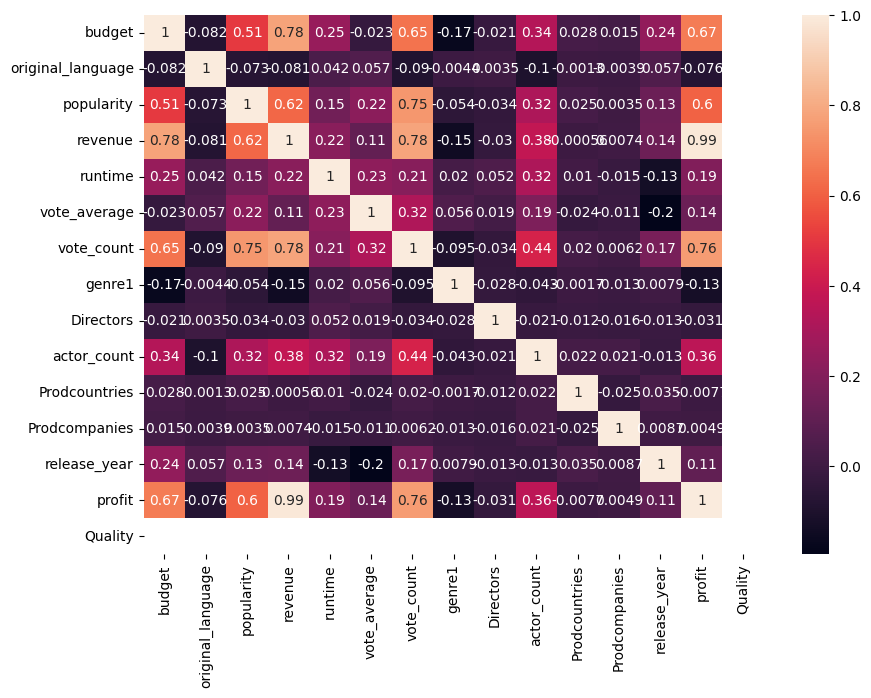

In [28]:
corr_mat=scale_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_mat,annot=True)

In [29]:
scale_df.drop(columns=['profit','Quality'],axis=1,inplace=True)

In [30]:
# Dimension reduction

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca=PCA()
pca.fit(scale_df)
features=range(pca.n_components_)
transformed_data=pca.transform(scale_df)

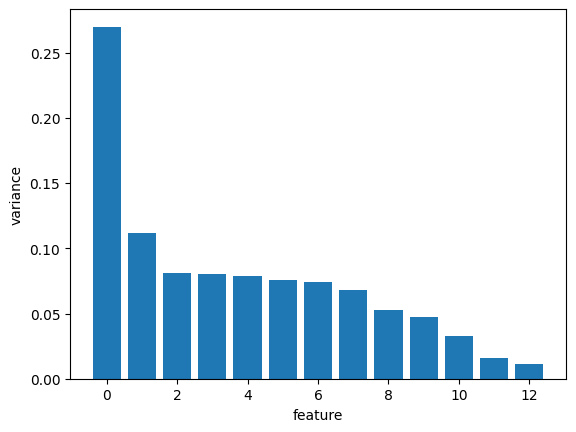

In [33]:
plt.bar(features,pca.explained_variance_ratio_)
plt.xlabel('feature')
plt.ylabel('variance')
plt.show()

In [34]:
pca2=PCA(n_components=2)
trand_data2=pca2.fit_transform(scale_df)
trand_data2.shape

(2121, 2)

Text(0, 0.5, 'pca2')

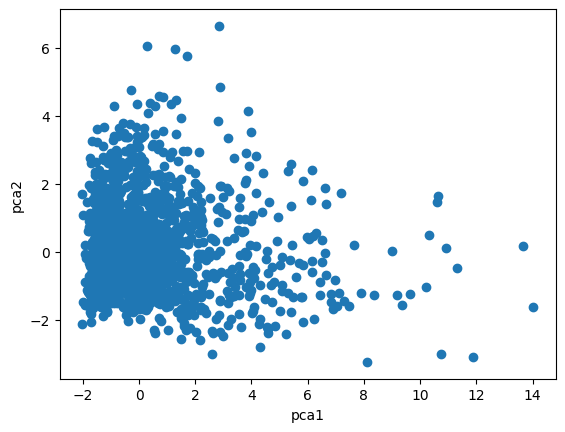

In [35]:
plt.scatter(trand_data2[:,0],trand_data2[:,1])
plt.xlabel('pca1')
plt.ylabel('pca2')

**Kmeans**

In [36]:
#Kmeans library
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score

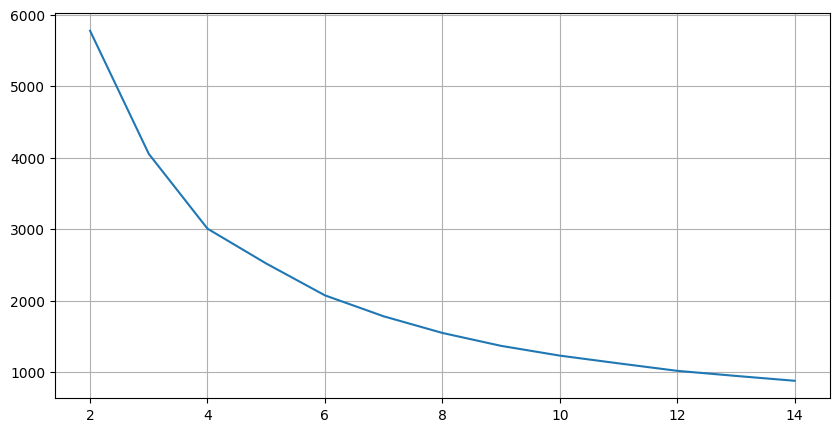

 
k = 2, score = 0.36685650840318546
k = 3, score = 0.16917740198506706
k = 4, score = 0.13333169274359297
k = 5, score = 0.07233745217013994
k = 6, score = 0.06909479230338651
k = 7, score = 0.07073015753605814
k = 8, score = 0.05449115188075885
k = 9, score = 0.043744092523787755
k = 10, score = 0.038658104819085784
k = 11, score = 0.024305105892424853
k = 12, score = 0.017433388398442686
k = 13, score = 0.011871797746656533
k = 14, score = 0.01193451953252286


In [37]:
#elbow method to find the k value
distortion=[]
for i in range(2,15):
    model=KMeans(n_clusters=i).fit(trand_data2)
    distortion.append(model.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(2,15),distortion)
plt.grid()
plt.show()
print(' ')
for i in range(2,15):
    model=KMeans(n_clusters=i).fit(trand_data2)
    score=silhouette_score(scale_df,model.labels_,metric='euclidean')
    print(f'k = {i}, score = {score}')

In [38]:
#model building
kmodel=KMeans(n_clusters=3).fit(trand_data2)
print(kmodel.cluster_centers_)
print(' ')
print(kmodel.labels_  )

[[-0.70587078 -0.48053316]
 [ 4.82275803 -0.49346737]
 [ 0.26511323  1.49536432]]
 
[1 1 1 ... 0 0 0]


Text(0, 0.5, 'pca2')

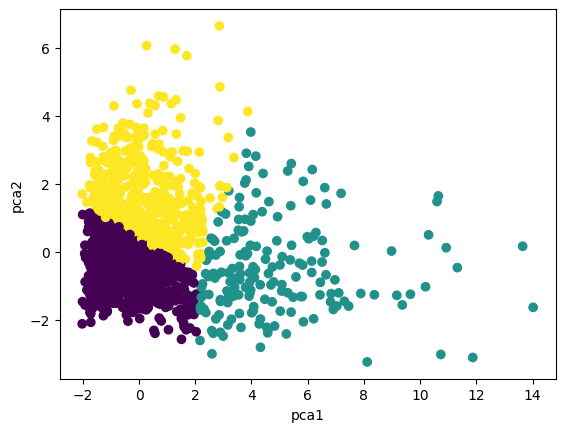

In [39]:
#plotting
plt.scatter(trand_data2[:,0],trand_data2[:,1],c=kmodel.labels_)
plt.xlabel('pca1')

plt.ylabel('pca2')

In [40]:
kmodel.labels_

array([1, 1, 1, ..., 0, 0, 0])

**Hiearchical**

In [73]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [74]:
linkage_data=linkage(trand_data2,method='ward',metric='euclidean')

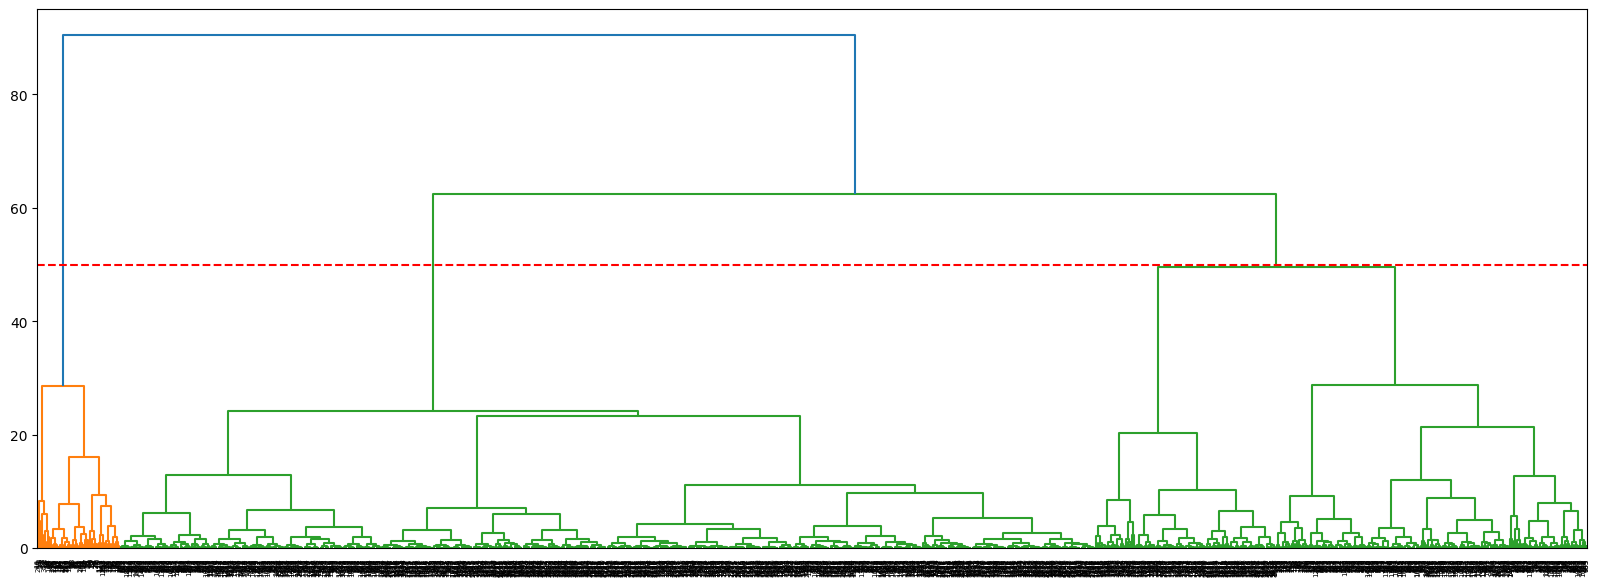

In [75]:
#dendogram plotting
plt.figure(figsize=(20,7))
den=dendrogram(linkage_data)
plt.axhline(y=50,color='r',linestyle='--')
plt.show()

In [76]:
hmodel=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hmodel.fit_predict(trand_data2)

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

Text(0, 0.5, 'pca2')

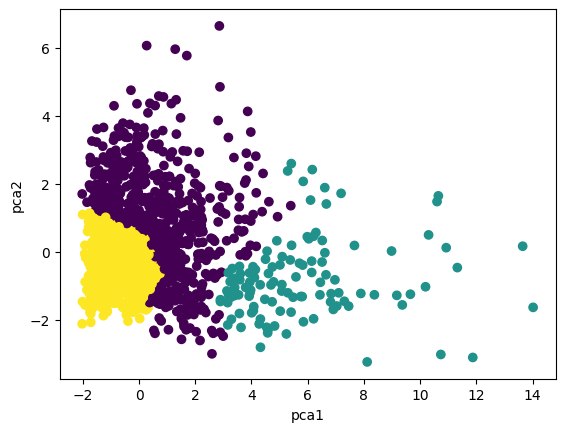

In [77]:
plt.scatter(trand_data2[:,0],trand_data2[:,1],c=hmodel.labels_)
plt.xlabel('pca1')
plt.ylabel('pca2')

**DBScan**

In [78]:
#density based scan
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [79]:
nn=NearestNeighbors(n_neighbors=5)
nf=nn.fit(trand_data2)
distance,index=nf.kneighbors(trand_data2)

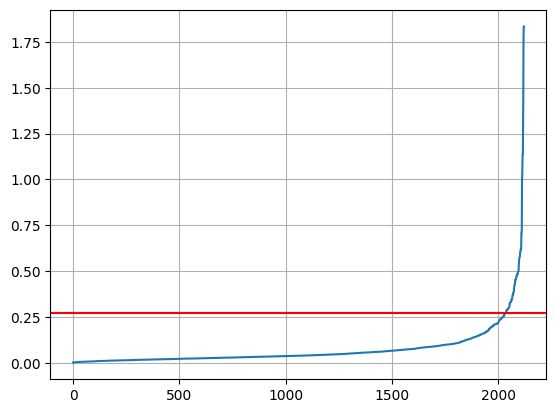

In [80]:
#calculating disatance
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.axhline(y=0.27,color='r')
plt.grid()
plt.show()

In [81]:
#epsilon minimum samples
eps=0.27
for i in range(2,16):                                                   #min_samples based on score
    model2 = DBSCAN(eps=eps, min_samples=i)
    model2.fit(trand_data2)
    score = silhouette_score(trand_data2, model2.labels_)
    print(f'min_samples = {i}, score = {score}')

min_samples = 2, score = 0.10050205037894105
min_samples = 3, score = 0.21909390422101815
min_samples = 4, score = 0.23350870373421526
min_samples = 5, score = 0.2112017417564765
min_samples = 6, score = 0.20396969299243434
min_samples = 7, score = 0.2953066740102743
min_samples = 8, score = 0.23605163788692654
min_samples = 9, score = 0.1446369187211448
min_samples = 10, score = 0.16092627565465165
min_samples = 11, score = 0.2479196822756954
min_samples = 12, score = 0.08673829591064311
min_samples = 13, score = 0.24700007492016096
min_samples = 14, score = 0.23250066333059308
min_samples = 15, score = 0.5013415943832518


In [82]:
db=DBSCAN(eps=eps,min_samples=7)
db.fit(trand_data2)
dlabels=db.labels_+1
dlabels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

Text(0, 0.5, 'pca2')

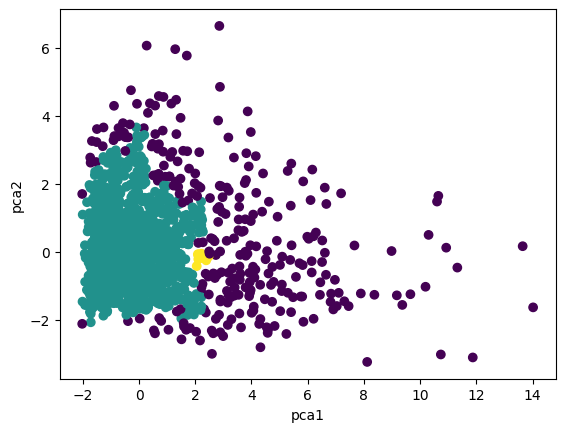

In [83]:
#plotting
plt.scatter(trand_data2[:,0],trand_data2[:,1],c=dlabels)
plt.xlabel('pca1')
plt.ylabel('pca2')

In [84]:
#comparing the scores
Kmscore=silhouette_score(trand_data2,kmodel.labels_,metric='euclidean')
Hiscore=silhouette_score(trand_data2,hmodel.labels_,metric='euclidean')
DBscore=silhouette_score(trand_data2,db.labels_,metric='euclidean')
print('Silhoute scores')
print('--'*30)
print('Kmean      : ',Kmscore)
print('Hirachical : ',Hiscore)
print('DBSCAN     : ',DBscore)

Silhoute scores
------------------------------------------------------------
Kmean      :  0.4281349021489943
Hirachical :  0.4155252115926867
DBSCAN     :  0.2953066740102743


**KMeans is the best model**

In [85]:
# adding the kmeans label to the top rated dataset as clusters

In [86]:
topdf['cluster']=kmodel.labels_ 

In [87]:
topdf

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality,cluster
0,237000000,7,150.437577,2787965087,162.0,7.2,11800,0,419,83,53,364,2009,2550965087,0,1
1,300000000,7,139.082615,961000000,169.0,6.9,4500,1,361,34,52,814,2007,661000000,0,1
3,250000000,7,112.312950,1084939099,165.0,7.6,9106,0,169,158,52,445,2012,834939099,0,1
6,260000000,7,48.681969,591794936,100.0,7.4,3330,2,133,13,53,707,2010,331794936,0,1
7,280000000,7,134.279229,1405403694,141.0,7.3,6767,0,559,72,53,155,2015,1125403694,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728,1000000,9,1.193779,0,90.0,6.6,58,6,412,7,13,739,2000,-1000000,0,0
4730,1000000,17,0.212443,99000,111.0,7.4,63,4,608,15,53,774,1997,-901000,0,0
4734,1000000,7,23.307949,424760,77.0,6.9,658,14,979,19,53,548,2004,-575240,0,0
4735,1000000,8,14.269792,2040920,81.0,6.6,238,0,924,7,53,152,1992,1040920,0,0


In [88]:
# topdf.to_csv('toprate2.csv')

Text(0.5, 1.0, 'Clusters based on Revenue')

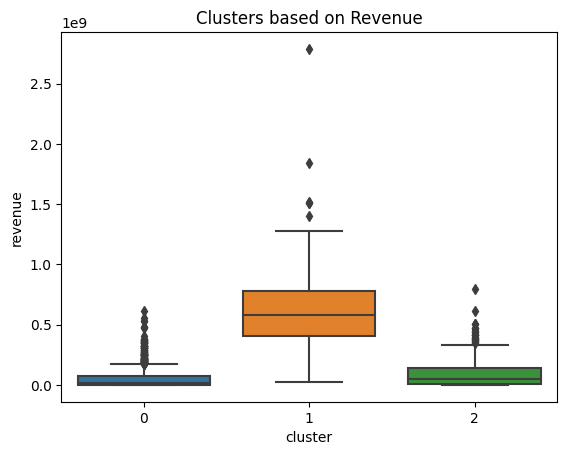

In [89]:
sns.boxplot(y =topdf['revenue'], x=topdf['cluster'])
plt.title('Clusters based on Revenue')

In [90]:
# highest revenue with fourth cluster

Text(0.5, 1.0, 'Clusters based on Budget')

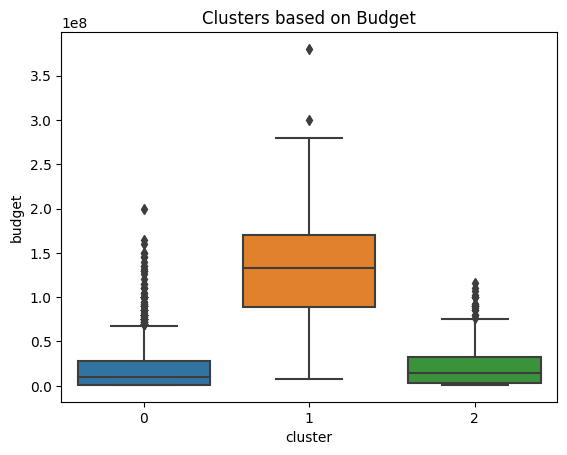

In [91]:
sns.boxplot(y =topdf['budget'], x=topdf['cluster'])
plt.title('Clusters based on Budget')

In [92]:
#most budget fourth cluster

Text(0.5, 1.0, 'Clusters based on Popularity')

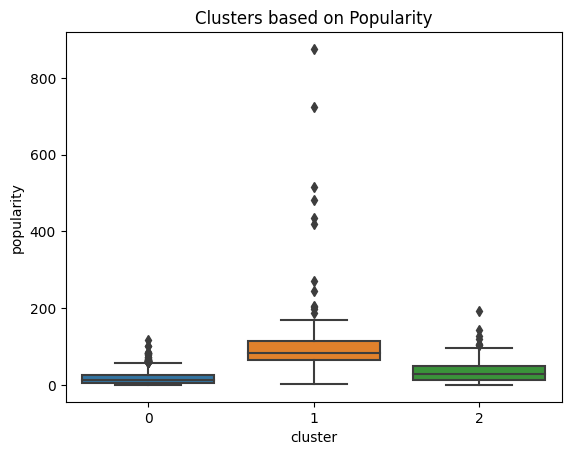

In [93]:
sns.boxplot(y =topdf['popularity'], x=topdf['cluster'])
plt.title('Clusters based on Popularity')

In [94]:
#high popularity fourth cluster

Text(0.5, 1.0, 'Clusters Based on Runtime')

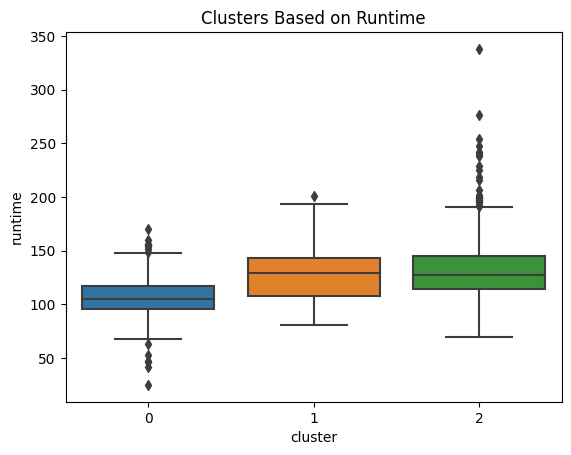

In [95]:
sns.boxplot(y =topdf['runtime'], x=topdf['cluster'])
plt.title('Clusters Based on Runtime')

In [96]:
#maximum rentime fourth cluster

Text(0.5, 1.0, 'Clusters Based on vote_count')

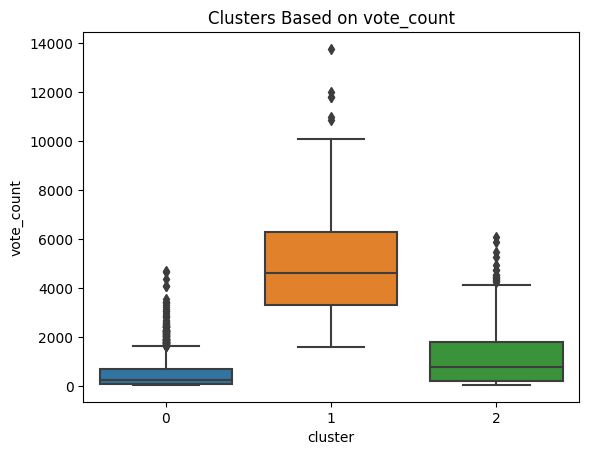

In [97]:
sns.boxplot(y =topdf['vote_count'], x=topdf['cluster'])
plt.title('Clusters Based on vote_count')

In [98]:
#most actors fourth cluster

Text(0.5, 1.0, 'Clusters Based on Number of Actors')

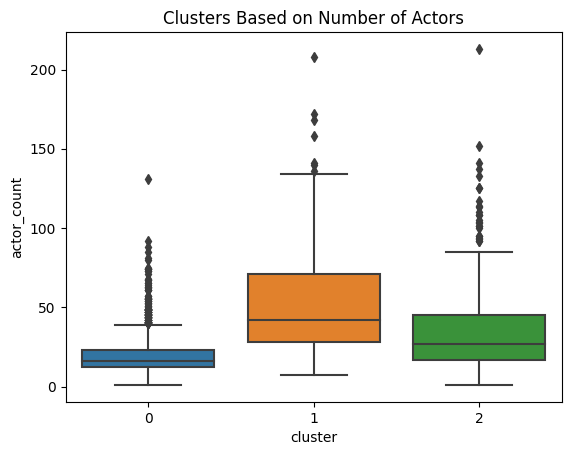

In [99]:
sns.boxplot(y =topdf['actor_count'], x=topdf['cluster'])
plt.title('Clusters Based on Number of Actors')

In [100]:
#maximum profit fourth cluster

Text(0.5, 1.0, 'Cluster Based on Profit')

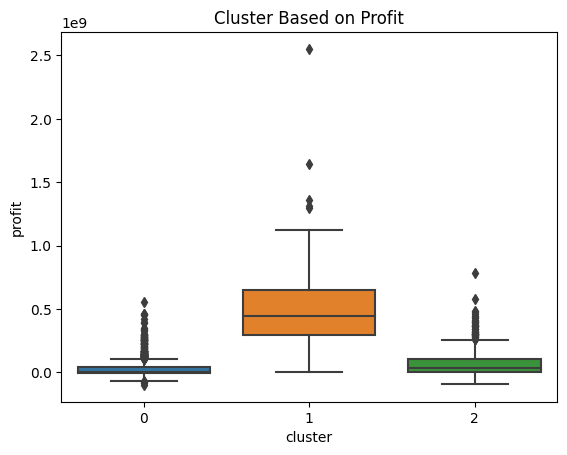

In [101]:
sns.boxplot(y =topdf['profit'], x=topdf['cluster'])
plt.title('Cluster Based on Profit')

<Axes: xlabel='genre1', ylabel='count'>

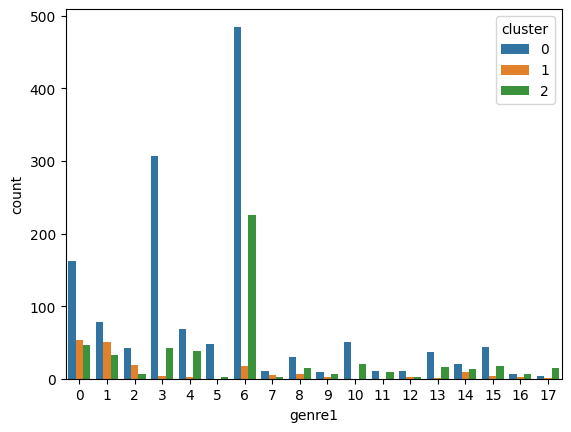

In [102]:
sns.countplot(x='genre1',hue='cluster',data=topdf)

In [71]:
# from the above boxplots 
# found that features like Popularity , Budget , Revenue , runtime and No. of actors semms to effect the Ratings
# 3 optimal groups are formed

In [72]:
# cluster 1 includes movies which have profit greater than 0.5B , with number of actor more than 50, runtime of around 120 - 150
#popularity grater than 100, Budget greater than 1B and revenue greater than 0.5B  .
#Cluster 0 and 2 have a profit less than 0.3B ,cluster 2 have number of actors more than cluser 0, 
#cluster 0 includes runtime less than cluster 1 and cluster 2, the vote count of cluster 1 is greater than cluster 2 and 1,


In [103]:
g2df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 0 to 4737
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             2121 non-null   int64  
 1   original_language  2121 non-null   object 
 2   popularity         2121 non-null   float64
 3   revenue            2121 non-null   int64  
 4   runtime            2121 non-null   float64
 5   status             2121 non-null   object 
 6   vote_average       2121 non-null   float64
 7   vote_count         2121 non-null   int64  
 8   genre1             2121 non-null   object 
 9   Directors          2121 non-null   object 
 10  actor_count        2121 non-null   int64  
 11  Prodcountries      2121 non-null   object 
 12  Prodcompanies      2121 non-null   object 
 13  release_year       2121 non-null   int64  
 14  profit             2121 non-null   int64  
 15  Quality            2121 non-null   object 
dtypes: float64(3), int64(6), obje

In [104]:
topdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 0 to 4737
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             2121 non-null   int64  
 1   original_language  2121 non-null   int32  
 2   popularity         2121 non-null   float64
 3   revenue            2121 non-null   int64  
 4   runtime            2121 non-null   float64
 5   vote_average       2121 non-null   float64
 6   vote_count         2121 non-null   int64  
 7   genre1             2121 non-null   int32  
 8   Directors          2121 non-null   int32  
 9   actor_count        2121 non-null   int64  
 10  Prodcountries      2121 non-null   int32  
 11  Prodcompanies      2121 non-null   int32  
 12  release_year       2121 non-null   int64  
 13  profit             2121 non-null   int64  
 14  Quality            2121 non-null   int32  
 15  cluster            2121 non-null   int32  
dtypes: float64(3), int32(7), int6

In [105]:
g2df['cluster']=kmodel.labels_ 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Science Fiction'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Family'),
  Text(6, 0, 'Fantasy'),
  Text(7, 0, 'History'),
  Text(8, 0, 'Thriller'),
  Text(9, 0, 'Western'),
  Text(10, 0, 'Romance'),
  Text(11, 0, 'Crime'),
  Text(12, 0, 'War'),
  Text(13, 0, 'Comedy'),
  Text(14, 0, 'Horror'),
  Text(15, 0, 'Mystery'),
  Text(16, 0, 'Documentary'),
  Text(17, 0, 'Music')])

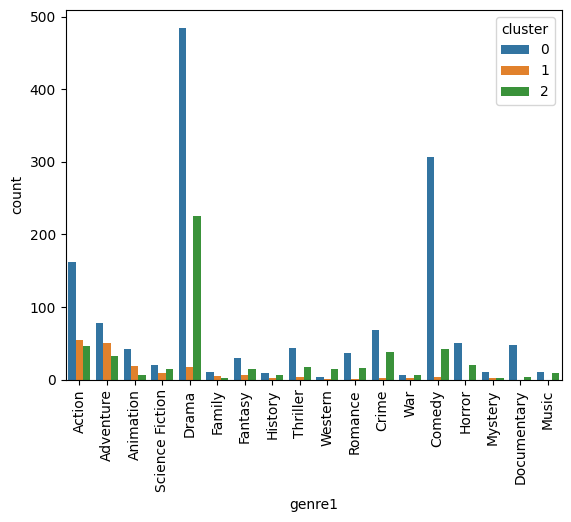

In [107]:
sns.countplot(x='genre1',hue='cluster',data=g2df)
plt.xticks(rotation=90)

In [ ]:
# culster 1 : Action , Adventure and Animation 
# cluster 0 : Action , Adventure , Animation , Science Fiction , Drama, Family , Fantasy , Thriller , Romance , Crime, Comedy
# Horror , Documentry .
# cluster 2: Western, War, Music and Documentary  